0 681.3706
1 152.3479517603579
2 78.85144142614601
3 57.228473214285714
4 46.44618205128206
5 39.03998724608725
6 34.57303082786778
7 30.015880952380954
8 28.290721861471866
9 26.144519317892886
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

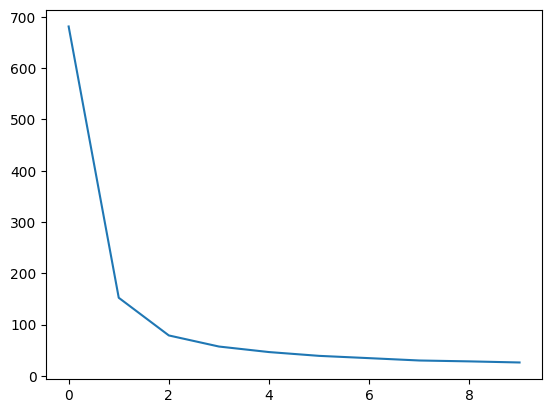

In [19]:
import sklearn.datasets
from sklearn.cluster import KMeans

iris = sklearn.datasets.load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
kmeans.cluster_centers_
kmeans.inertia_
kmeans.n_iter_

wcss = []
for i in range(10):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(X)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)   


import matplotlib.pyplot as plt
plt.plot(range(10), wcss) 

kmeans_new = KMeans(n_clusters=2)
kmeans_new.fit(X)
y_kmeans = kmeans_new.predict(X)    

## compute sillothe score
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

print(y_kmeans)

k=1 inertia=600.000 n_iter=2
k=2 inertia=222.362 n_iter=4
k=3 inertia=139.820 n_iter=5
k=4 inertia=114.093 n_iter=5
k=5 inertia=90.807 n_iter=5
k=6 inertia=80.037 n_iter=8
k=7 inertia=70.720 n_iter=11
k=8 inertia=62.565 n_iter=6
k=9 inertia=54.828 n_iter=9
k=10 inertia=47.801 n_iter=12


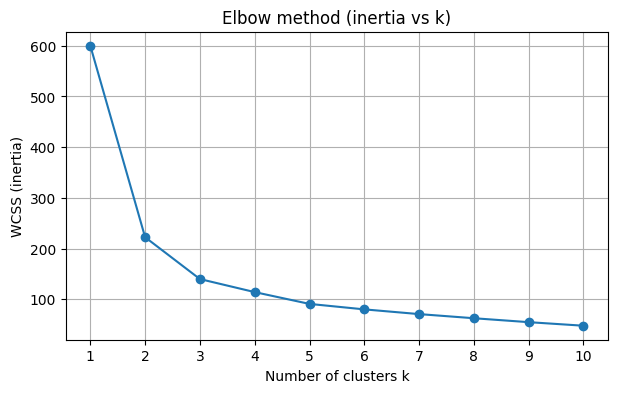

k=2 silhouette=0.5818
k=3 silhouette=0.4599
k=4 silhouette=0.3869
k=5 silhouette=0.3419
k=6 silhouette=0.3267
k=7 silhouette=0.3241
k=8 silhouette=0.3329
k=9 silhouette=0.3562
k=10 silhouette=0.3600


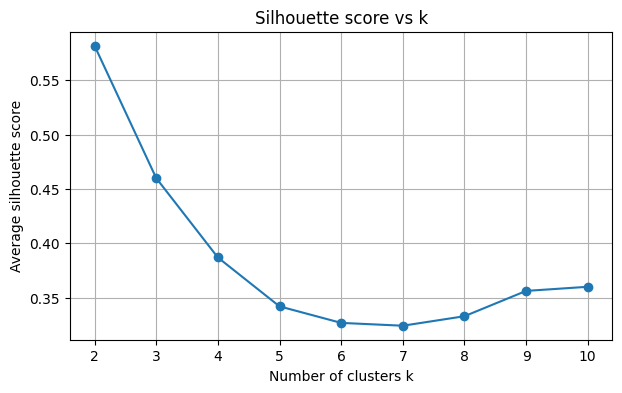

Best k by silhouette: 2


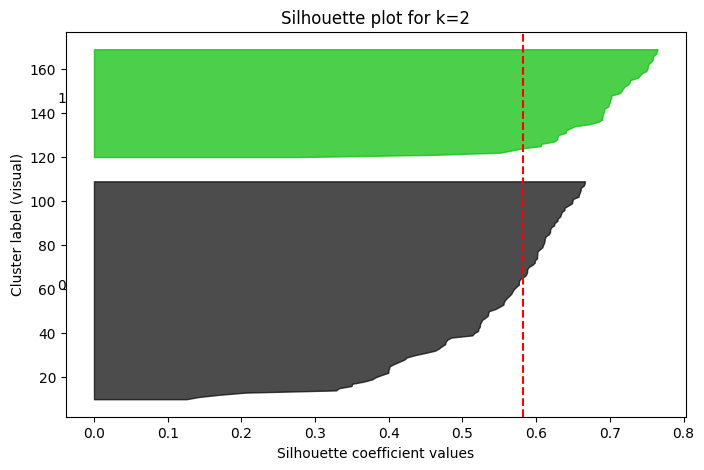

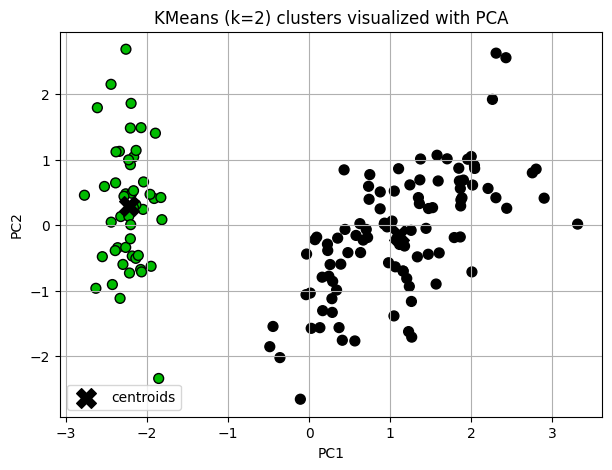

In [20]:
# clustering_practice.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Load data
iris = datasets.load_iris()
X = iris.data
y_true = iris.target  # only for optional comparison

# OPTIONAL: scale features (good habit)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# ---------- Elbow (WCSS) ----------
wcss = []
ks = list(range(1, 11))          # k = 1..10
for k in ks:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(Xs)
    wcss.append(km.inertia_)
    print(f"k={k} inertia={km.inertia_:.3f} n_iter={km.n_iter_}")

plt.figure(figsize=(7,4))
plt.plot(ks, wcss, marker='o')
plt.xticks(ks)
plt.xlabel("Number of clusters k")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow method (inertia vs k)")
plt.grid(True)
plt.show()

# ---------- Silhouette scores for k >= 2 ----------
sil_scores = []
ks_for_sil = list(range(2, 11))
for k in ks_for_sil:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(Xs)
    sil = silhouette_score(Xs, labels)
    sil_scores.append(sil)
    print(f"k={k} silhouette={sil:.4f}")

plt.figure(figsize=(7,4))
plt.plot(ks_for_sil, sil_scores, marker='o')
plt.xticks(ks_for_sil)
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette score")
plt.title("Silhouette score vs k")
plt.grid(True)
plt.show()

# ---------- Pick a k (example: best silhouette) ----------
best_k = ks_for_sil[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)

km_best = KMeans(n_clusters=best_k, init='k-means++', n_init=10, random_state=42)
labels_best = km_best.fit_predict(Xs)

# ---------- Silhouette sample plot (detailed) ----------
sample_sil_values = silhouette_samples(Xs, labels_best)
y_lower = 10
plt.figure(figsize=(8, 5))
for i in range(best_k):
    ith_cluster_sil_values = sample_sil_values[labels_best == i]
    ith_cluster_sil_values.sort()
    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / best_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label (visual)")
plt.title(f"Silhouette plot for k={best_k}")
plt.axvline(x=np.mean(sample_sil_values), color="red", linestyle="--")
plt.show()

# ---------- 2D PCA visualization of clusters ----------
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xs)

plt.figure(figsize=(7,5))
colors = cm.nipy_spectral(labels_best.astype(float) / best_k)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', s=50, c=colors, edgecolor='k')
centers2 = pca.transform(km_best.cluster_centers_)
plt.scatter(centers2[:, 0], centers2[:, 1], marker='X', s=200, c='black', label='centroids')
plt.title(f'KMeans (k={best_k}) clusters visualized with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()
